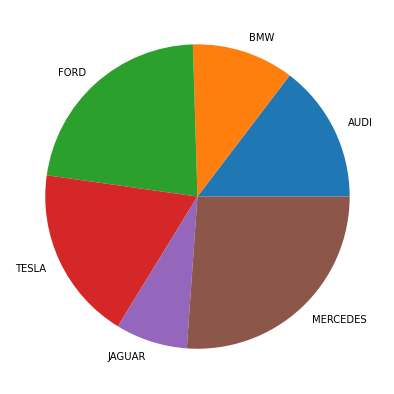

In [9]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
 
data = [23, 17, 35, 29, 12, 41]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
 
# show plot
plt.show()

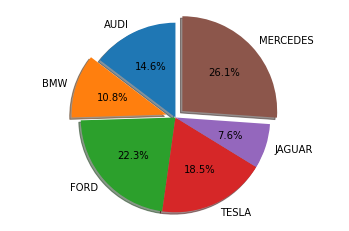

In [12]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
 
data = [23, 17, 35, 29, 12, 41]

explode = (0, 0.1, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=cars, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#Multiple Pie Charts

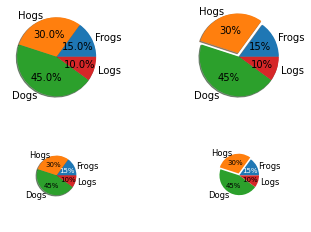

In [2]:
import matplotlib.pyplot as plt

# Some data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# Shift the second slice using explode
axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=True, radius=0.5)
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
                                          explode=(0, 0.05, 0, 0))
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

#Bar

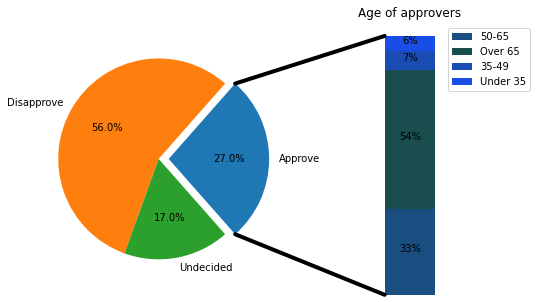

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.33, .54, .07, .06]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age of approvers')
ax2.legend(('50-65', 'Over 65', '35-49', 'Under 35'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


#Nested

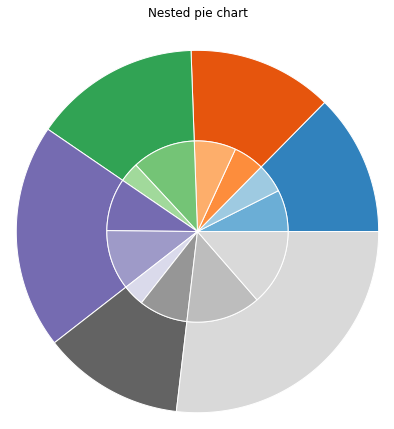

In [8]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
size = 6
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
 
data = np.array([[23, 16], [17, 23],
                 [35, 11], [29, 33],
                 [12, 27], [41, 42]])
 
# normalizing data to 2 pi
norm = data / np.sum(data)*2 * np.pi
 
# obtaining ordinates of bar edges
left = np.cumsum(np.append(0,
                           norm.flatten()[:-1])).reshape(data.shape)
 
# Creating color scale
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(6)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9,
                              10, 12, 13, 15,
                              17, 18, 20 ]))
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7),
                       subplot_kw = dict(polar = True))
 
ax.bar(x = left[:, 0],
       width = norm.sum(axis = 1),
       bottom = 1-size,
       height = size,
       color = outer_colors,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.bar(x = left.flatten(),
       width = norm.flatten(),
       bottom = 1-2 * size,
       height = size,
       color = inner_colors,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.set(title ="Nested pie chart")
ax.set_axis_off()
 
# show plot
plt.show()

#Donut

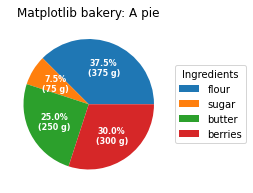

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()


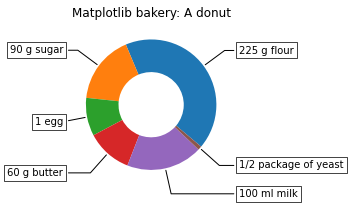

In [5]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

#Seaborn Pie Chart

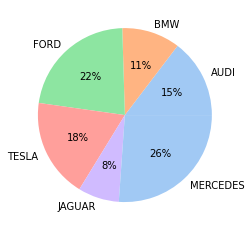

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
 
data = [23, 17, 35, 29, 12, 41]
 
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = cars, colors = colors, autopct='%.0f%%')
plt.show()



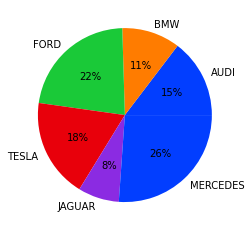

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
 
data = [23, 17, 35, 29, 12, 41]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = cars, colors = colors, autopct='%.0f%%')
plt.show()